In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV,GridSearchCV, StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

from scipy.stats import randint

from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("dataset_DT.csv")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34.0,blue-collar,single,secondary,no,13408.0,no,no,cellular,1.0,apr,647.0,2.0,-1.0,0.0,unknown,no
1,49.0,management,divorced,tertiary,no,20727.0,no,no,cellular,1.0,apr,285.0,3.0,132.0,2.0,failure,no
2,32.0,services,single,tertiary,no,1743.0,yes,no,cellular,1.0,apr,1156.0,1.0,261.0,3.0,other,no
3,46.0,management,divorced,tertiary,no,10469.0,yes,no,cellular,1.0,apr,202.0,2.0,-1.0,0.0,unknown,no
4,26.0,management,single,tertiary,no,7628.0,no,no,cellular,1.0,apr,263.0,1.0,-1.0,0.0,unknown,no


In [ ]:
df.shape

(18423, 17)

In [ ]:
# any duplicate values or not
df.duplicated().sum()

0

In [ ]:
df['job'].replace('unknown',None,inplace=True)
df['education'].replace('unknown',None,inplace=True)
df['contact'].replace('unknown',None,inplace=True)
df['poutcome'].replace('unknown',None,inplace=True)
df.isna().sum()

age              0
job            112
marital          0
education     1073
default          0
balance          0
housing          0
loan             0
contact       4313
day            306
month          314
duration         0
campaign         0
pdays            0
previous         0
poutcome     13259
y                0
dtype: int64

In [ ]:
for i in df.columns:
  display(df[i].value_counts())
  print()
  print()
  print('-----------------------------------------------------------------------------------------------')

32.0    870
33.0    859
31.0    858
34.0    800
35.0    795
       ... 
93.0      2
90.0      2
95.0      2
94.0      1
88.0      1
Name: age, Length: 77, dtype: int64



-----------------------------------------------------------------------------------------------


management       4082
blue-collar      3722
technician       2949
admin.           2012
services         1582
retired          1176
self-employed     670
entrepreneur      588
unemployed        560
student           507
housemaid         463
Name: job, dtype: int64



-----------------------------------------------------------------------------------------------


married     10693
single       5667
divorced     2063
Name: marital, dtype: int64



-----------------------------------------------------------------------------------------------


secondary    9005
tertiary     5789
primary      2556
Name: education, dtype: int64



-----------------------------------------------------------------------------------------------


no     18229
yes      194
Name: default, dtype: int64



-----------------------------------------------------------------------------------------------


0.0       1111
1.0         51
2.0         49
3.0         37
4.0         37
          ... 
3297.0       1
1467.0       1
2534.0       1
1305.0       1
4416.0       1
Name: balance, Length: 5164, dtype: int64



-----------------------------------------------------------------------------------------------


yes    9645
no     8778
Name: housing, dtype: int64



-----------------------------------------------------------------------------------------------


no     15924
yes     2499
Name: loan, dtype: int64



-----------------------------------------------------------------------------------------------


cellular     12995
telephone     1115
Name: contact, dtype: int64



-----------------------------------------------------------------------------------------------


20.0    1014
18.0     911
17.0     862
21.0     805
14.0     791
5.0      774
15.0     759
12.0     742
6.0      729
19.0     716
13.0     713
8.0      704
7.0      702
16.0     655
30.0     647
11.0     631
9.0      624
4.0      611
29.0     575
28.0     534
2.0      526
3.0      489
22.0     380
23.0     373
26.0     373
27.0     362
25.0     316
10.0     277
1.0      197
24.0     189
31.0     136
Name: day, dtype: int64



-----------------------------------------------------------------------------------------------


may    5039
jul    2374
aug    2179
jun    1984
nov    1835
apr    1561
feb    1173
jan     579
oct     500
sep     408
mar     324
dec     153
Name: month, dtype: int64



-----------------------------------------------------------------------------------------------


158.0     61
226.0     59
178.0     56
207.0     55
151.0     55
          ..
1331.0     1
1608.0     1
1508.0     1
1833.0     1
1298.0     1
Name: duration, Length: 1560, dtype: int64



-----------------------------------------------------------------------------------------------


1.0     7830
2.0     5452
3.0     2292
4.0     1225
5.0      580
6.0      398
7.0      216
8.0      139
9.0       78
10.0      45
11.0      44
12.0      29
13.0      28
17.0      13
14.0      13
15.0       9
16.0       9
18.0       5
20.0       4
21.0       3
24.0       2
19.0       2
23.0       1
31.0       1
29.0       1
28.0       1
32.0       1
25.0       1
55.0       1
Name: campaign, dtype: int64



-----------------------------------------------------------------------------------------------


-1.0      13254
 182.0      144
 92.0       137
 91.0       116
 181.0      109
          ...  
 791.0        1
 481.0        1
 701.0        1
 413.0        1
 232.0        1
Name: pdays, Length: 527, dtype: int64



-----------------------------------------------------------------------------------------------


0.0     13254
1.0      1682
2.0      1328
3.0       744
4.0       439
5.0       304
6.0       190
7.0       129
8.0        89
9.0        55
10.0       45
11.0       43
12.0       24
13.0       23
15.0       11
14.0       10
17.0        9
16.0        7
19.0        6
23.0        4
20.0        4
24.0        3
27.0        3
25.0        2
30.0        2
21.0        2
29.0        2
22.0        2
55.0        1
37.0        1
18.0        1
40.0        1
35.0        1
26.0        1
58.0        1
Name: previous, dtype: int64



-----------------------------------------------------------------------------------------------


failure    2794
success    1357
other      1013
Name: poutcome, dtype: int64



-----------------------------------------------------------------------------------------------


no     13134
yes     5289
Name: y, dtype: int64



-----------------------------------------------------------------------------------------------


In [ ]:
df.isna().sum()

age              0
job            112
marital          0
education     1073
default          0
balance          0
housing          0
loan             0
contact       4313
day            306
month          314
duration         0
campaign         0
pdays            0
previous         0
poutcome     13259
y                0
dtype: int64

In [ ]:
for column_name in df.columns:
  mode_value = df[column_name].mode().iloc[0]
  df[column_name].fillna(mode_value, inplace=True)

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        18423 non-null  float64
 1   job        18423 non-null  object 
 2   marital    18423 non-null  object 
 3   education  18423 non-null  object 
 4   default    18423 non-null  object 
 5   balance    18423 non-null  float64
 6   housing    18423 non-null  object 
 7   loan       18423 non-null  object 
 8   contact    18423 non-null  object 
 9   day        18423 non-null  float64
 10  month      18423 non-null  object 
 11  duration   18423 non-null  float64
 12  campaign   18423 non-null  float64
 13  pdays      18423 non-null  float64
 14  previous   18423 non-null  float64
 15  poutcome   18423 non-null  object 
 16  y          18423 non-null  object 
dtypes: float64(7), object(10)
memory usage: 2.4+ MB


In [ ]:
le_1 = LabelEncoder()
df['job']=le_1.fit_transform(df['job'])

le_2 = LabelEncoder()
df['marital']=le_2.fit_transform(df['marital'])

le_3 = LabelEncoder()
df['education']=le_3.fit_transform(df['education'])

le_4 = LabelEncoder()
df['default']=le_4.fit_transform(df['default'])

le_5 = LabelEncoder()
df['housing']=le_5.fit_transform(df['housing'])

le_6 = LabelEncoder()
df['loan']=le_6.fit_transform(df['loan'])

le_7 = LabelEncoder()
df['contact']=le_7.fit_transform(df['contact'])

le_8 = LabelEncoder()
df['month']=le_8.fit_transform(df['month'])

le_9 = LabelEncoder()
df['poutcome']=le_9.fit_transform(df['poutcome'])

le_10 = LabelEncoder()
df['y']=le_10.fit_transform(df['y'])

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34.0,1,2,1,0,13408.0,0,0,0,1.0,0,647.0,2.0,-1.0,0.0,0,0
1,49.0,4,0,2,0,20727.0,0,0,0,1.0,0,285.0,3.0,132.0,2.0,0,0
2,32.0,7,2,2,0,1743.0,1,0,0,1.0,0,1156.0,1.0,261.0,3.0,1,0
3,46.0,4,0,2,0,10469.0,1,0,0,1.0,0,202.0,2.0,-1.0,0.0,0,0
4,26.0,4,2,2,0,7628.0,0,0,0,1.0,0,263.0,1.0,-1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,41.0,9,1,1,0,2152.0,0,0,0,30.0,11,134.0,1.0,121.0,1.0,1,0
18419,57.0,4,1,1,0,0.0,0,0,0,30.0,11,585.0,1.0,-1.0,0.0,0,0
18420,40.0,1,1,1,0,1451.0,0,0,0,30.0,11,117.0,1.0,121.0,1.0,2,1
18421,38.0,9,2,1,0,1711.0,0,0,1,30.0,11,234.0,1.0,-1.0,0.0,0,1


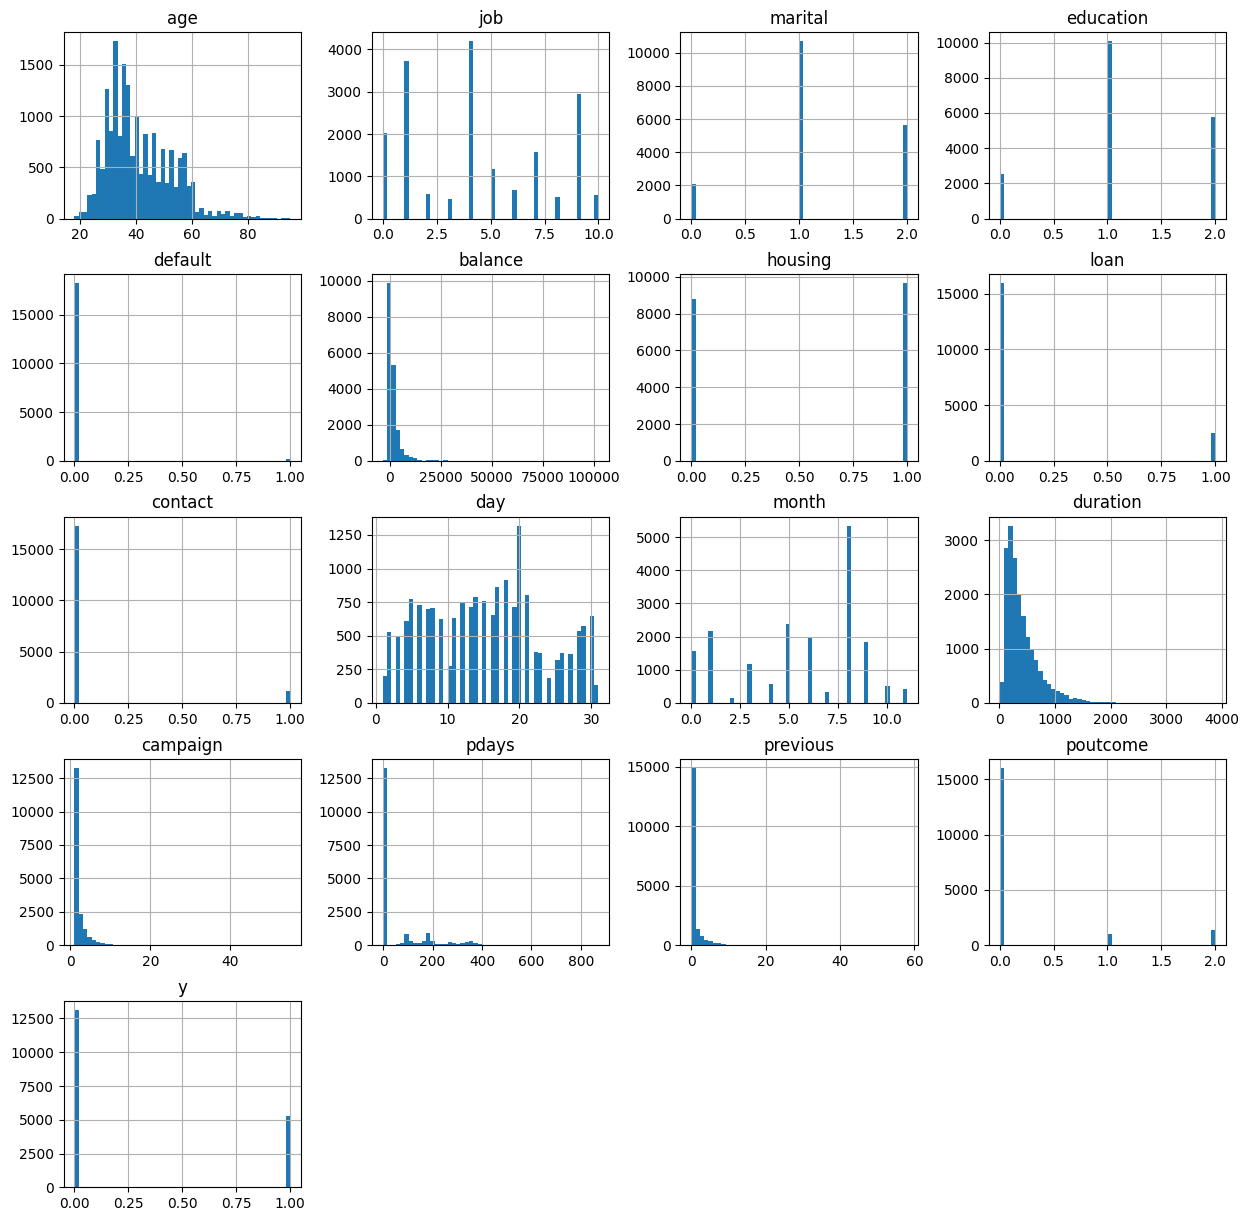

In [ ]:
df.hist(bins=50, figsize=(15, 15))
plt.show()

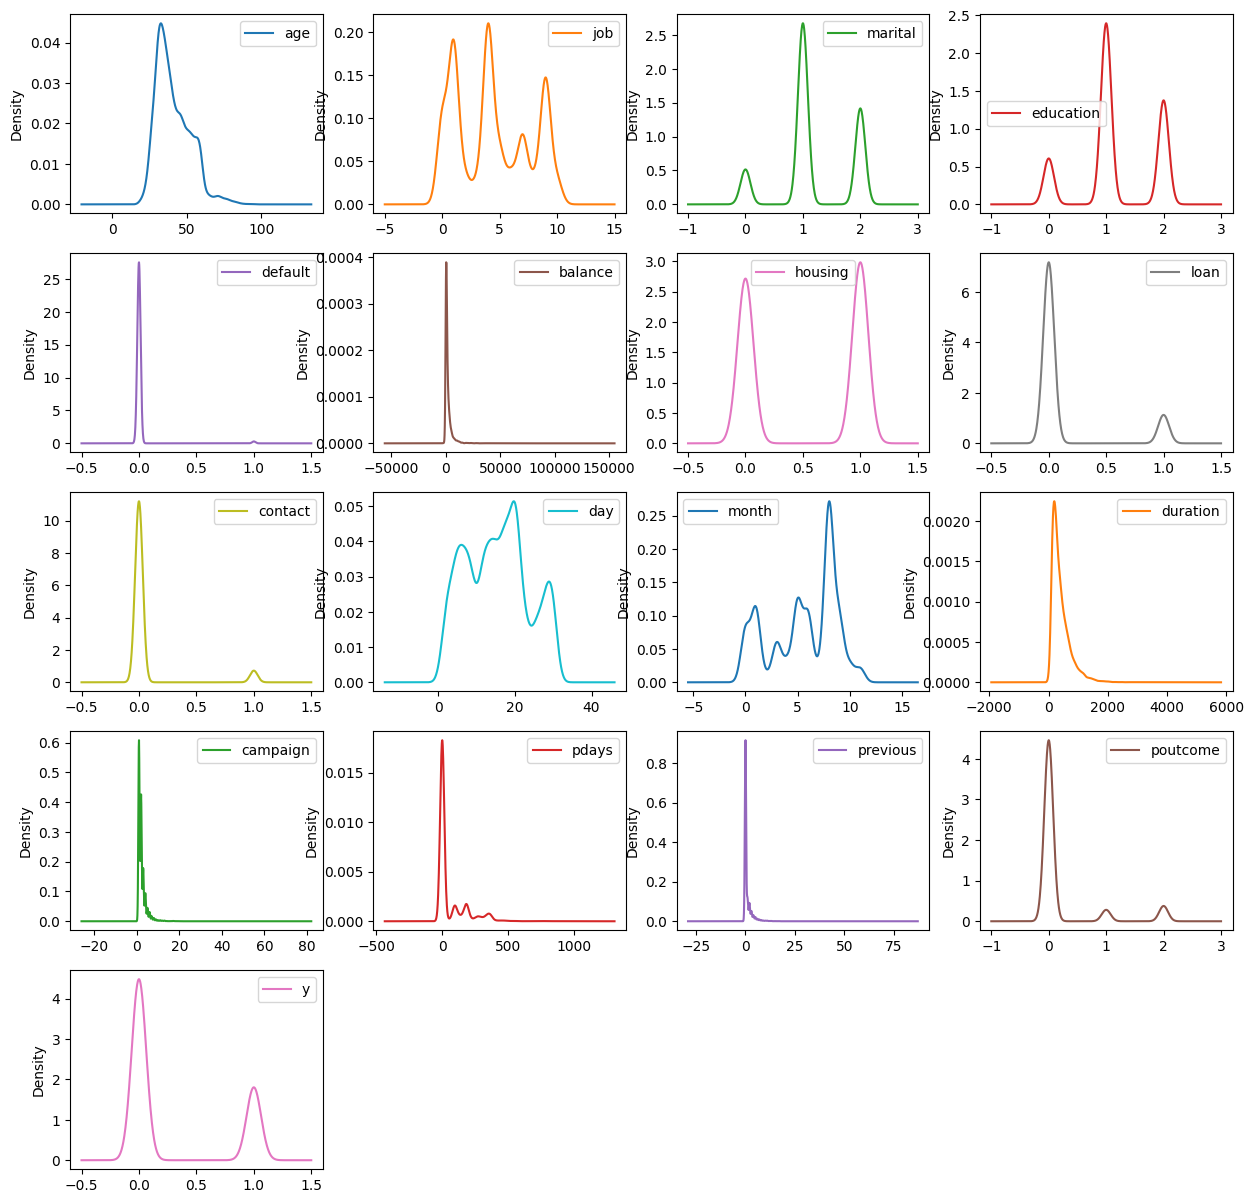

In [ ]:
df.plot(kind='density', subplots=True, layout=(5,4), figsize=(15, 15), sharex=False)
plt.show()

#Right-Skewed:
'age', 'default','balance','duration','campaign','pdays','previous'

#Not normal distribution
'job', 'marital', 'education', 'housing', 'loan', 'contact', 'day','month','poutcome'

In [ ]:
standardscaler = StandardScaler()
minmax_scale = MinMaxScaler()
df_scaled = pd.DataFrame()
df_scaled[['age', 'default','balance','duration','campaign','pdays','previous']] = standardscaler.fit_transform(df[['age', 'default','balance','duration','campaign','pdays','previous']])
df_scaled[['job', 'marital', 'education', 'housing', 'loan', 'contact', 'day','month','poutcome']] = minmax_scale.fit_transform(df[['job', 'marital', 'education', 'housing', 'loan', 'contact', 'day','month','poutcome']])
df_scaled['y'] = df['y']

In [ ]:
df_scaled

,age,default,balance,duration,campaign,pdays,previous,job,marital,education,housing,loan,contact,day,month,poutcome,y
0,-0.606755,-0.103162,3.088450,0.727712,-0.141015,-0.519520,-0.393435,0.1,1.0,0.5,0.0,0.0,0.0,0.000000,0.0,0.0,0
1,0.702327,-0.103162,5.044118,-0.392224,0.363631,0.663204,0.504849,0.4,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
2,-0.781300,-0.103162,-0.028488,2.302428,-0.645660,1.810357,0.953992,0.7,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.5,0
3,0.440510,-0.103162,2.303136,-0.649004,-0.141015,-0.519520,-0.393435,0.4,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0
4,-1.304933,-0.103162,1.544009,-0.460286,-0.645660,-0.519520,-0.393435,0.4,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,0.004150,-0.103162,0.080798,-0.859379,-0.645660,0.565385,0.055707,0.9,0.5,0.5,0.0,0.0,0.0,0.966667,1.0,0.5,0
18419,1.400504,-0.103162,-0.494225,0.535900,-0.645660,-0.519520,-0.393435,0.4,0.5,0.5,0.0,0.0,0.0,0.966667,1.0,0.0,0
18420,-0.083122,-0.103162,-0.106512,-0.911973,-0.645660,0.565385,0.055707,0.1,0.5,0.5,0.0,0.0,0.0,0.966667,1.0,1.0,1
18421,-0.257667,-0.103162,-0.037039,-0.550005,-0.645660,-0.519520,-0.393435,0.9,1.0,0.5,0.0,0.0,1.0,0.966667,1.0,0.0,1


In [ ]:
x = df_scaled.drop('y', axis=1)
y = df_scaled['y']

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        18423 non-null  float64
 1   default    18423 non-null  float64
 2   balance    18423 non-null  float64
 3   duration   18423 non-null  float64
 4   campaign   18423 non-null  float64
 5   pdays      18423 non-null  float64
 6   previous   18423 non-null  float64
 7   job        18423 non-null  float64
 8   marital    18423 non-null  float64
 9   education  18423 non-null  float64
 10  housing    18423 non-null  float64
 11  loan       18423 non-null  float64
 12  contact    18423 non-null  float64
 13  day        18423 non-null  float64
 14  month      18423 non-null  float64
 15  poutcome   18423 non-null  float64
dtypes: float64(16)
memory usage: 2.2 MB


In [ ]:
discrete_features = x.dtypes != object
discrete_features

age          True
default      True
balance      True
duration     True
campaign     True
pdays        True
previous     True
job          True
marital      True
education    True
housing      True
loan         True
contact      True
day          True
month        True
poutcome     True
dtype: bool

In [ ]:
#use mutual information classify to select mutual feature
def make_mi_scores(x, y, discrete_features):
    mi_scores = mutual_info_classif(x, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y, discrete_features)

# show a few features with their MI scores
mi_scores

balance      0.191520
duration     0.081286
pdays        0.040613
month        0.035681
poutcome     0.032724
housing      0.020206
age          0.019612
job          0.014322
day          0.010671
previous     0.007710
campaign     0.003684
loan         0.003576
education    0.003520
marital      0.003154
contact      0.000596
default      0.000010
Name: MI Scores, dtype: float64

In [ ]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.01]

x = drop_uninformative(x, mi_scores)
x

,age,balance,duration,pdays,job,housing,day,month,poutcome
0,-0.606755,3.088450,0.727712,-0.519520,0.1,0.0,0.000000,0.0,0.0
1,0.702327,5.044118,-0.392224,0.663204,0.4,0.0,0.000000,0.0,0.0
2,-0.781300,-0.028488,2.302428,1.810357,0.7,1.0,0.000000,0.0,0.5
3,0.440510,2.303136,-0.649004,-0.519520,0.4,1.0,0.000000,0.0,0.0
4,-1.304933,1.544009,-0.460286,-0.519520,0.4,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
18418,0.004150,0.080798,-0.859379,0.565385,0.9,0.0,0.966667,1.0,0.5
18419,1.400504,-0.494225,0.535900,-0.519520,0.4,0.0,0.966667,1.0,0.0
18420,-0.083122,-0.106512,-0.911973,0.565385,0.1,0.0,0.966667,1.0,1.0
18421,-0.257667,-0.037039,-0.550005,-0.519520,0.9,0.0,0.966667,1.0,0.0


In [ ]:
new_df=pd.concat([x,y],axis=1)
new_df

,age,balance,duration,pdays,job,housing,day,month,poutcome,y
0,-0.606755,3.088450,0.727712,-0.519520,0.1,0.0,0.000000,0.0,0.0,0
1,0.702327,5.044118,-0.392224,0.663204,0.4,0.0,0.000000,0.0,0.0,0
2,-0.781300,-0.028488,2.302428,1.810357,0.7,1.0,0.000000,0.0,0.5,0
3,0.440510,2.303136,-0.649004,-0.519520,0.4,1.0,0.000000,0.0,0.0,0
4,-1.304933,1.544009,-0.460286,-0.519520,0.4,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
18418,0.004150,0.080798,-0.859379,0.565385,0.9,0.0,0.966667,1.0,0.5,0
18419,1.400504,-0.494225,0.535900,-0.519520,0.4,0.0,0.966667,1.0,0.0,0
18420,-0.083122,-0.106512,-0.911973,0.565385,0.1,0.0,0.966667,1.0,1.0,1
18421,-0.257667,-0.037039,-0.550005,-0.519520,0.9,0.0,0.966667,1.0,0.0,1


<Axes: >

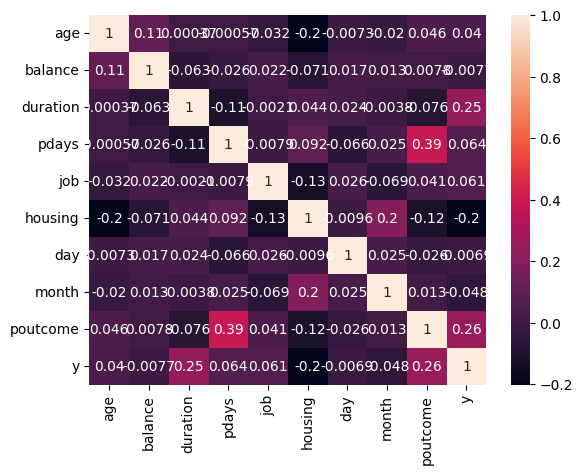

In [ ]:
corr_matrix_pearson = new_df.corr(method='pearson')
sns.heatmap(corr_matrix_pearson, annot = True)

In [ ]:
corr_matrix_pearson

,age,balance,duration,pdays,job,housing,day,month,poutcome,y
age,1.000000,0.105569,0.000373,-0.000569,-0.031659,-0.197543,-0.007305,-0.019766,0.045566,0.039743
balance,0.105569,1.000000,-0.063482,-0.025938,0.022463,-0.070754,0.016882,0.013278,0.007822,-0.007689
duration,0.000373,-0.063482,1.000000,-0.106844,-0.002131,0.044015,0.024277,-0.003829,-0.075728,0.246416
pdays,-0.000569,-0.025938,-0.106844,1.000000,-0.007878,0.091822,-0.066327,0.024622,0.388231,0.063664
job,-0.031659,0.022463,-0.002131,-0.007878,1.000000,-0.131620,0.025746,-0.068668,0.041187,0.060519
housing,-0.197543,-0.070754,0.044015,0.091822,-0.131620,1.000000,-0.009612,0.196547,-0.115448,-0.200340
day,-0.007305,0.016882,0.024277,-0.066327,0.025746,-0.009612,1.000000,0.025149,-0.026499,-0.006888
month,-0.019766,0.013278,-0.003829,0.024622,-0.068668,0.196547,0.025149,1.000000,0.012646,-0.047777
poutcome,0.045566,0.007822,-0.075728,0.388231,0.041187,-0.115448,-0.026499,0.012646,1.000000,0.257634
y,0.039743,-0.007689,0.246416,0.063664,0.060519,-0.200340,-0.006888,-0.047777,0.257634,1.000000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=42, shuffle = True)
x_train.size, x_test.size, y_train.size, y_test.size

(132642, 33165, 14738, 3685)

# **Naive Bayes**

In [ ]:
# Creating the hyperparameter grid
params_NB = {'var_smoothing': np.logspace(9,-9, num=100)}
gs=GaussianNB()
# Instantiating GridSearchCV object
gs_NB = GridSearchCV(estimator=gs,
                     param_grid=params_NB,
                     cv=5,
                     verbose=1,
                     scoring='accuracy')
result = gs_NB.fit(x, y)

# Print the tuned parameters and score
print("Tuned Naive Bayes Parameters: {}".format(result.best_params_))
print('Best Score: ', result.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Tuned Naive Bayes Parameters: {'var_smoothing': 0.06579332246575682}
Best Score:  0.7563917752074688


In [ ]:
print('Naive Bayes')
nb_model = GaussianNB(var_smoothing=result.best_params_['var_smoothing'])
nb_model.fit(x_train,y_train)
print("Training set score: {:.3f}".format(nb_model.score(x_train, y_train)))
print("Test set score: {:.3f}".format(nb_model.score(x_test, y_test)))
print('-'*50)
predict1 = nb_model.predict(x_test)
print("Classification Report:\n",classification_report(y_test, predict1))
print('-'*50)
print("Confusion matrix:")
print(confusion_matrix(y_test, predict1))

Naive Bayes
Training set score: 0.761
Test set score: 0.746
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84      2595
           1       0.63      0.33      0.44      1090

    accuracy                           0.75      3685
   macro avg       0.70      0.63      0.64      3685
weighted avg       0.73      0.75      0.72      3685

--------------------------------------------------
Confusion matrix:
[[2385  210]
 [ 727  363]]


# **Decision Tree**

In [ ]:
max_depth = list(range(1, 50))
min_samples_leaf = list(range(1, 60))
min_samples_split = list(range(2,50))
max_features = list(range(1, x_train.shape[1]))
criterion = ['entropy' , 'gini']


dt_model = DecisionTreeClassifier()

#carry out randomized search
parameter_grid = dict(criterion=criterion,
                      max_features=max_features,
                      min_samples_leaf=min_samples_leaf,
                      max_depth=max_depth,
                      min_samples_split=min_samples_split)

grid = RandomizedSearchCV(estimator=dt_model, param_distributions=parameter_grid)
grid.fit(x_train,y_train)

print("Best criterion ：" , grid.best_estimator_.criterion)
print("Best max_features" , grid.best_estimator_.max_features)
print("Best min_samples_leaf : " , grid.best_estimator_.min_samples_leaf)
print("Best max_depth : " , grid.best_estimator_.max_depth )
print("Best min_samples_split : " , grid.best_estimator_.min_samples_split)

# Print the tuned parameters and score
print('Best Score: ', grid.best_score_)

Best criterion ： entropy
Best max_features 7
Best min_samples_leaf :  59
Best max_depth :  39
Best min_samples_split :  23
Best Score:  0.7715427090724002


In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy',
                      max_features=7,
                      min_samples_leaf=59,
                      max_depth=39,
                      min_samples_split=23)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=39, max_features=7,
                       min_samples_leaf=59, min_samples_split=23)

In [ ]:
print("Accuracy on training set: {:.3f}".format(dt_model.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt_model.score(x_test, y_test)))

Accuracy on training set: 0.793
Accuracy on test set: 0.766


In [ ]:
predict2 = dt_model.predict(x_test)
print("Classification Report:\n",classification_report(y_test, predict2))
print('-'*50)
print("Confusion matrix:")
print(confusion_matrix(y_test, predict2))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      2595
           1       0.62      0.53      0.57      1090

    accuracy                           0.77      3685
   macro avg       0.72      0.70      0.71      3685
weighted avg       0.76      0.77      0.76      3685

--------------------------------------------------
Confusion matrix:
[[2247  348]
 [ 515  575]]


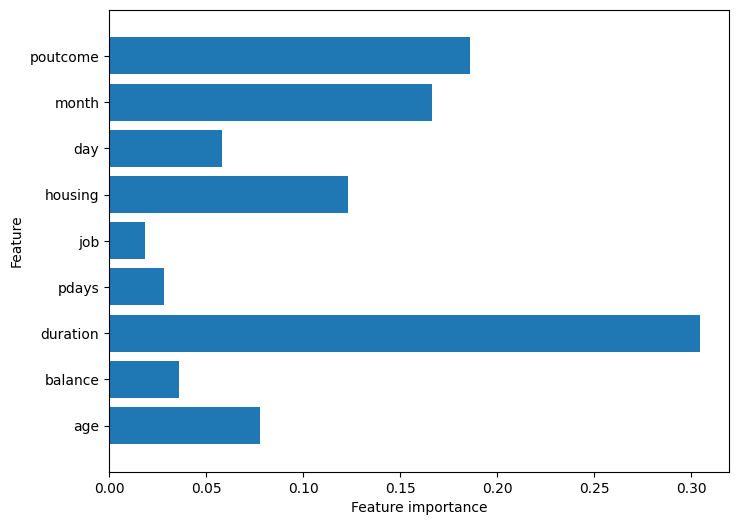

In [ ]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 9
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt_model)
plt.savefig('feature_importance')

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(dt_model, out_file="dtree.dot", class_names=["Subscribed", "Not Subscribed"],feature_names=x.columns, impurity=False, filled=True)

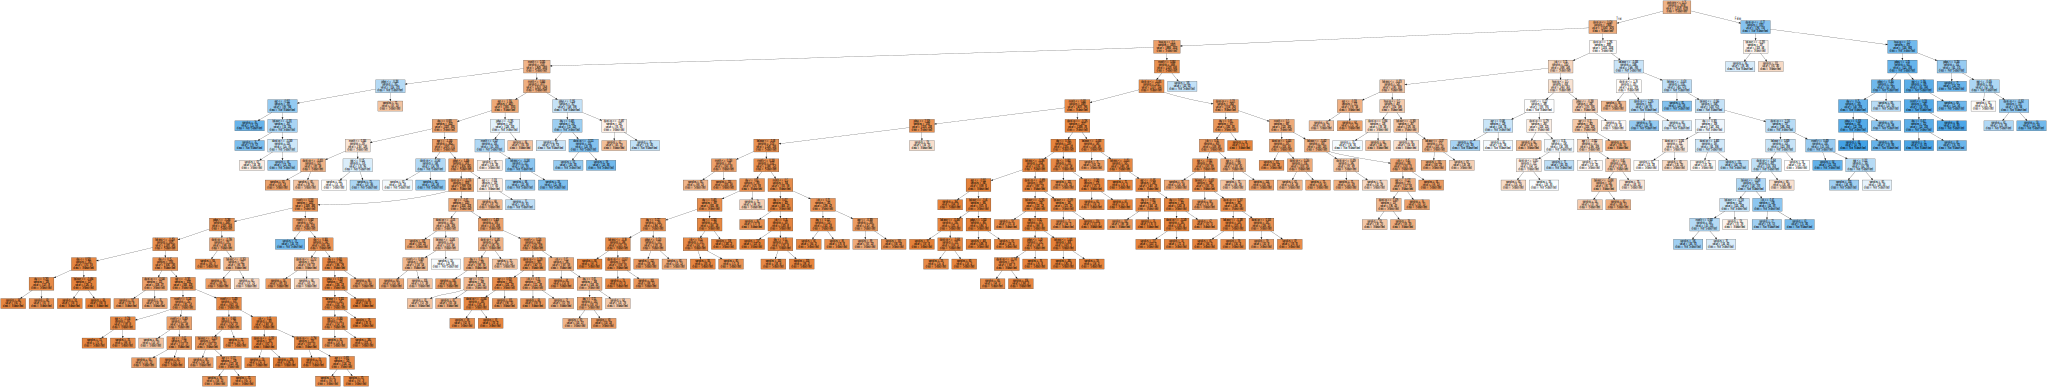

In [ ]:
with open("dtree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# **RANDOM FOREST**

In [ ]:
n_estimators = list(range(1, 100,10))
max_depth = list(range(1, 50))
min_samples_leaf = list(range(1, 60))
min_samples_split = list(range(2,50))
max_features = list(range(1, x_train.shape[1]))
criterion = ['entropy' , 'gini']


rf_model = RandomForestClassifier()

#carry out randomized search
parameter_grid = dict(n_estimators=n_estimators,
                      criterion=criterion,
                      max_features=max_features,
                      min_samples_leaf=min_samples_leaf,
                      max_depth=max_depth,
                      min_samples_split=min_samples_split)

grid = RandomizedSearchCV(estimator=rf_model, param_distributions=parameter_grid)
grid.fit(x_train,y_train)

print("Best number of estimators ：" , grid.best_estimator_.n_estimators)
print("Best criterion ：" , grid.best_estimator_.criterion)
print("Best max_features" , grid.best_estimator_.max_features)
print("Best min_samples_leaf : " , grid.best_estimator_.min_samples_leaf)
print("Best max_depth : " , grid.best_estimator_.max_depth )
print("Best min_samples_split : " , grid.best_estimator_.min_samples_split)

# Print the tuned parameters and score
print('Best Score: ', grid.best_score_)

Best number of estimators ： 71
Best criterion ： entropy
Best max_features 7
Best min_samples_leaf :  11
Best max_depth :  36
Best min_samples_split :  20
Best Score:  0.7878271443166682


In [ ]:
rf_model = RandomForestClassifier(n_estimators=71,
                      criterion='entropy',
                      max_features=7,
                      min_samples_leaf=11,
                      max_depth=36,
                      min_samples_split=20)
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=36, max_features=7,
                       min_samples_leaf=11, min_samples_split=20,
                       n_estimators=71)

In [ ]:
print("Accuracy on training set: {:.3f}".format(rf_model.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf_model.score(x_test, y_test)))
predict3 = rf_model.predict(x_test)
print("Classification Report:\n",classification_report(y_test, predict3))
print('-'*50)
print("Confusion matrix:")
print(confusion_matrix(y_test, predict3))

Accuracy on training set: 0.857
Accuracy on test set: 0.774
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85      2595
           1       0.65      0.51      0.57      1090

    accuracy                           0.77      3685
   macro avg       0.73      0.70      0.71      3685
weighted avg       0.76      0.77      0.77      3685

--------------------------------------------------
Confusion matrix:
[[2293  302]
 [ 529  561]]


# **Support Vector Machines**

In [ ]:
# Creating the hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000] }

svm = LinearSVC()
# Instantiating RandomizedSearchCV object
svm_cv = RandomizedSearchCV(svm, param_grid, cv = 10)

result = svm_cv.fit(x_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision svm Parameters: {}".format(result.best_params_))
print('Best Score: ', result.best_score_)

Tuned Decision svm Parameters: {'C': 10}
Best Score:  0.7576346189806384


In [ ]:
print('SVM')
svm = LinearSVC(C=10)
svm.fit(x_train,y_train)
print("Training set score: {:.3f}".format(svm.score(x_train, y_train)))
print("Test set score: {:.3f}".format(svm.score(x_test, y_test)))
print('-'*50)
predict4 = svm.predict(x_test)
print("Classification Report:\n",classification_report(y_test, predict4))
print('-'*50)
print("Confusion matrix:")
print(confusion_matrix(y_test, predict4))

SVM
Training set score: 0.758
Test set score: 0.748
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84      2595
           1       0.65      0.31      0.42      1090

    accuracy                           0.75      3685
   macro avg       0.71      0.62      0.63      3685
weighted avg       0.73      0.75      0.72      3685

--------------------------------------------------
Confusion matrix:
[[2413  182]
 [ 748  342]]


## **K NEAREST NEIGHBOURS**

In [ ]:
# Creating the hyperparameter grid
param_dist = {"n_neighbors":range(1, 26),
              "p": range(1, 26)}

# Instantiating Nearest Neighbours classifier
knn_model = KNeighborsClassifier()

# Instantiating GridSearchCV object
knn_model_cv = RandomizedSearchCV(knn_model, param_dist, cv = 5, scoring='accuracy')

result = knn_model_cv.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Knn Parameters: {}".format(result.best_params_))
print('Best Score: ', result.best_score_)

Tuned Knn Parameters: {'p': 2, 'n_neighbors': 23}
Best Score:  0.7659108980500834


In [ ]:
print('KNN')
knn_model = KNeighborsClassifier(n_neighbors=23,p=2)
knn_model.fit(x_train,y_train)
print("Training set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("Test set score: {:.3f}".format(knn_model.score(x_test, y_test)))
print('-'*50)
predict5 = knn_model.predict(x_test)
print("Classification Report:\n",classification_report(y_test, predict5))
print('-'*50)
print("Confusion matrix:")
print(confusion_matrix(y_test, predict5))

KNN
Training set score: 0.783
Test set score: 0.753
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84      2595
           1       0.64      0.37      0.47      1090

    accuracy                           0.75      3685
   macro avg       0.71      0.64      0.66      3685
weighted avg       0.74      0.75      0.73      3685

--------------------------------------------------
Confusion matrix:
[[2366  229]
 [ 683  407]]


# **ROC Curves**

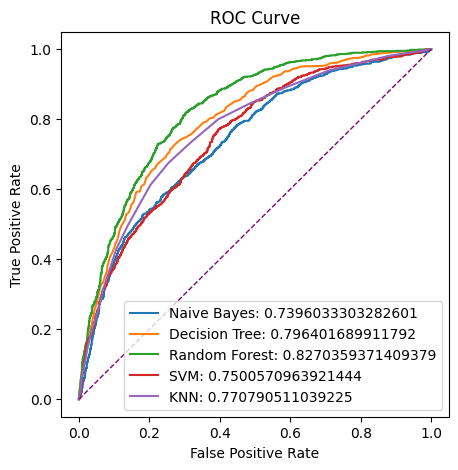

In [ ]:
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_model.predict_proba(x_test)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(x_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(x_test)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm._predict_proba_lr(x_test)[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(x_test)[:, 1])

plt.figure(figsize=(5, 5))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes: {roc_auc_score(y_test, nb_model.predict_proba(x_test)[:, 1])}')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree: {roc_auc_score(y_test, dt_model.predict_proba(x_test)[:, 1])}')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest: {roc_auc_score(y_test,rf_model.predict_proba(x_test)[:, 1])}')
plt.plot(fpr_svm, tpr_svm, label=f'SVM: {roc_auc_score(y_test, svm._predict_proba_lr(x_test)[:, 1])}')
plt.plot(fpr_knn, tpr_knn, label=f'KNN: {roc_auc_score(y_test, knn_model.predict_proba(x_test)[:, 1])}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='purple', lw=1, linestyle='--')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
auc = roc_auc_score(y_true, y_scores)